<a href="https://colab.research.google.com/github/Charlesrichie/Codespace-/blob/main/IoT_ML_with_Ton_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Downloading ToN_IoT Datasets (InSDN)

In [ ]:
# Download Dataset
import requests

def download_dataset(url, file_name):
  '''function to download dataset from url
  args
  url: str, download link
  file_name: str, name of the file
  '''
  r = requests.get(url, allow_redirects=True)
  open(file_name, 'wb').write(r.content)


download_dataset('https://cloudstor.aarnet.edu.au/plus/s/ds5zW91vdgjEj9i/download?path=%2FTrain_Test_datasets%2FTrain_Test_Network_dataset&files=Train_Test_Network.csv&downloadStartSecret=ohroysxk3vq', 'Train_Test_Network.csv')

### Load Datasets

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/drive")
# Load dataset

df_normal = pd.read_csv("/content/drive/MyDrive/InSDN_DatasetCSV/Normal_data.csv")
df_meta = pd.read_csv("/content/drive/MyDrive/InSDN_DatasetCSV/metasploitable-2.csv")
df_ovs = pd.read_csv("/content/drive/MyDrive/InSDN_DatasetCSV/OVS.csv")

Mounted at /content/drive


In [2]:
# Concatenate the DataFrames
dataset = pd.concat([df_normal, df_meta, df_ovs], ignore_index=True)

In [3]:
dataset.tail(30)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
343859,172.17.0.2-200.175.2.130-80-55340-6,200.175.2.130,55340,172.17.0.2,80,6,25/12/2019 05:19:01 PM,6304,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343860,172.17.0.2-200.175.2.130-80-55340-6,200.175.2.130,55340,172.17.0.2,80,6,25/12/2019 05:19:01 PM,585,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343861,172.17.0.2-200.175.2.130-80-55346-6,200.175.2.130,55346,172.17.0.2,80,6,25/12/2019 05:19:05 PM,7228,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343862,172.17.0.2-200.175.2.130-80-55346-6,200.175.2.130,55346,172.17.0.2,80,6,25/12/2019 05:19:05 PM,5308,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343863,172.17.0.2-200.175.2.130-80-55352-6,200.175.2.130,55352,172.17.0.2,80,6,25/12/2019 05:19:09 PM,5776,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343864,172.17.0.2-200.175.2.130-80-55352-6,200.175.2.130,55352,172.17.0.2,80,6,25/12/2019 05:19:09 PM,154,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343865,172.17.0.2-200.175.2.130-80-55362-6,200.175.2.130,55362,172.17.0.2,80,6,25/12/2019 05:19:13 PM,8377,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343866,172.17.0.2-200.175.2.130-80-55362-6,200.175.2.130,55362,172.17.0.2,80,6,25/12/2019 05:19:13 PM,216,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343867,172.17.0.2-200.175.2.130-80-55368-6,200.175.2.130,55368,172.17.0.2,80,6,25/12/2019 05:19:18 PM,4411,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343868,172.17.0.2-200.175.2.130-80-55368-6,200.175.2.130,55368,172.17.0.2,80,6,25/12/2019 05:19:18 PM,4101,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [4]:
dataset.shape

(343889, 84)

In [5]:
# list all dataset columns
print("Full Dataset Columns", dataset.columns, sep='\n',
      end='\n\n')
print("Unique values in the 'category' column",
      dataset['Label'].unique(), sep='\n')

Full Dataset Columns
Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'C

### Feature Extraction

In [9]:
# the features I want to use for prototyping
trial_features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
                  'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Fwd Pkts/s',
                  'Bwd Pkts/s', 'Pkt Len Mean', 'Label']

subset_dataset =  dataset[trial_features]
print(subset_dataset)

        Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              245230            44            40         124937.0   
1             1605449           107           149           1071.0   
2               53078             5             5             66.0   
3                6975             1             1              0.0   
4              190141            13            16            780.0   
...               ...           ...           ...              ...   
343884            296             1             1              0.0   
343885           3431             2             5            633.0   
343886           4121             1             1              0.0   
343887           5887             2             5            671.0   
343888            150             1             1              0.0   

        TotLen Bwd Pkts  Fwd Pkt Len Mean  Bwd Pkt Len Mean   Flow Byts/s  \
0                1071.0       2839.477273         26.775000  513835.99070   
1    

Label
Probe         98129
DDoS          73529
Normal        68424
DoS           53616
DDoS          48413
BFA            1405
Web-Attack      192
BOTNET          164
U2R              17
Name: count, dtype: int64


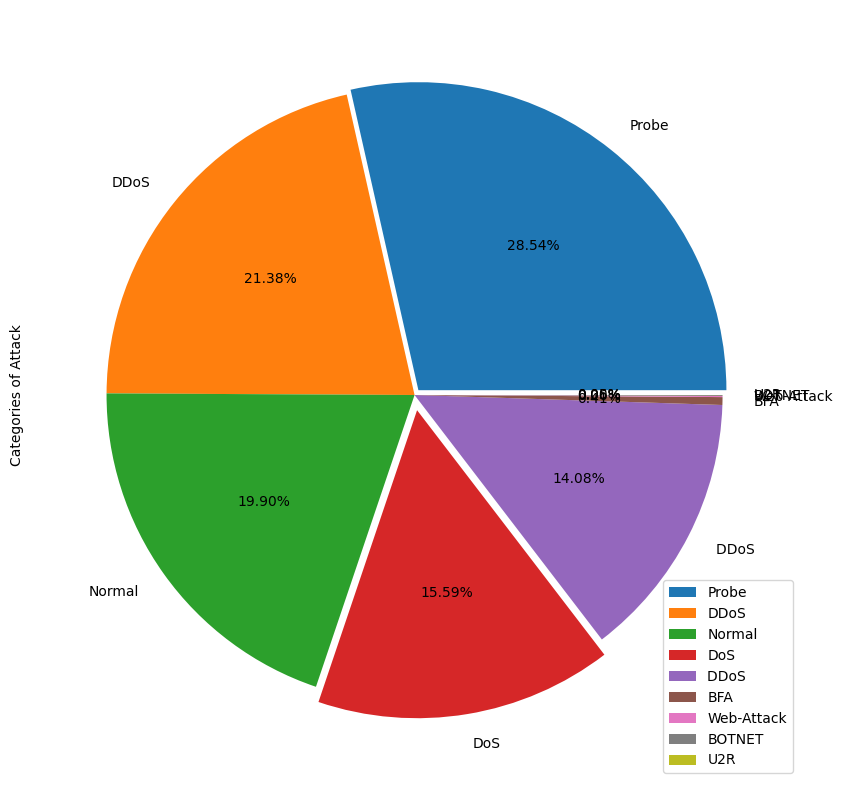

In [13]:
import matplotlib.pyplot as plt

# check the number of unique values in the target variable
print(subset_dataset['Label'].value_counts())
subset_dataset['Label'].value_counts().plot(kind = 'pie',
                                           explode = [0.02, 0, 0, 0.05, 0, 0, 0, 0, 0], # Corrected explode list length
                                           figsize = (10, 10),
                                           autopct = '%1.2f%%',
                                           shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(['Probe', 'DDoS', 'Normal', 'DoS', 'DDoS ', 'BFA', 'Web-Attack', 'BOTNET', 'U2R']) # Corrected legend labels
plt.show()

In [14]:
# check the data type of dataframe columns
subset_dataset.dtypes

,0
Flow Duration,int64
Tot Fwd Pkts,int64
Tot Bwd Pkts,int64
TotLen Fwd Pkts,float64
TotLen Bwd Pkts,float64
Fwd Pkt Len Mean,float64
Bwd Pkt Len Mean,float64
Flow Byts/s,float64
Flow Pkts/s,float64
Fwd Pkts/s,float64


In [15]:
# check for missing values
# subset_dataset[subset_dataset.isnull().any(axis=1)]
subset_dataset.isnull().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
343884,False
343885,False
343886,False
343887,False


In [16]:
# Split Data into Features and Target variables
X = subset_dataset.iloc[:, :-1].values
y = subset_dataset['Label']
print(X)
print(y)
print(X.shape)

[[2.45230000e+05 4.40000000e+01 4.00000000e+01 ... 1.79423398e+02
  1.63112180e+02 1.48244706e+03]
 [1.60544900e+06 1.07000000e+02 1.49000000e+02 ... 6.66480218e+01
  9.28089276e+01 1.71442802e+03]
 [5.30780000e+04 5.00000000e+00 5.00000000e+00 ... 9.42009872e+01
  9.42009872e+01 7.49090909e+01]
 ...
 [4.12100000e+03 1.00000000e+00 1.00000000e+00 ... 2.42659549e+02
  2.42659549e+02 0.00000000e+00]
 [5.88700000e+03 2.00000000e+00 5.00000000e+00 ... 3.39731612e+02
  8.49329030e+02 3.07500000e+02]
 [1.50000000e+02 1.00000000e+00 1.00000000e+00 ... 6.66666667e+03
  6.66666667e+03 0.00000000e+00]]
0             Normal
1             Normal
2             Normal
3             Normal
4             Normal
             ...    
343884    Web-Attack
343885    Web-Attack
343886    Web-Attack
343887    Web-Attack
343888    Web-Attack
Name: Label, Length: 343889, dtype: object
(343889, 12)


# One-Hot Encode Categorical Variables

In [17]:
# Handling Categorical Data
# Since there are no categorical features in the selected subset,
# one-hot encoding is not needed.
# X is already a numpy array from the previous step and can be used directly.
encoded_X = X
print(encoded_X.shape)

(343889, 12)


In [19]:
# np.set_printoptions(threshold=np.inf)

# print(encoded_X)

In [18]:
print(encoded_X.shape)

(343889, 12)


### Label Encode the target variable

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'BFA': np.int64(0), 'BOTNET': np.int64(1), 'DDoS': np.int64(2), 'DDoS ': np.int64(3), 'DoS': np.int64(4), 'Normal': np.int64(5), 'Probe': np.int64(6), 'U2R': np.int64(7), 'Web-Attack': np.int64(8)}


In [20]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(encoded_X, encoded_y, test_size=0.3,
                                                  random_state=0,
                                                  stratify=encoded_y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_val, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
[[1.36040000e+04 2.00000000e+00 4.00000000e+00 ... 1.47015584e+02
  2.94031167e+02 2.85714286e-01]
 [1.50000000e+01 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  1.33333333e+05 0.00000000e+00]
 [1.30000000e+01 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  1.53846154e+05 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  2.00000000e+06 0.00000000e+00]
 [1.50000000e+01 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  1.33333333e+05 0.00000000e+00]
 [1.47280000e+04 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  1.35795763e+02 0.00000000e+00]]
X Validation set
[[4.27000000e+02 1.00000000e+00 1.00000000e+00 ... 2.34192038e+03
  2.34192038e+03 1.50333333e+02]
 [1.03400000e+03 2.00000000e+00 1.00000000e+00 ... 1.93423598e+03
  9.67117988e+02 0.00000000e+00]
 [3.20000000e+01 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  6.25000000e+04 0.00000000e+00]
 ...
 [2.00000000e+00 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00


### Feature Scaling

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-3.08333927e-01 -2.85931837e-03 -1.92710835e-02 ... -5.96946507e-02
  -4.34535176e-01 -2.74556477e-01]
 [-3.08956174e-01 -3.93619594e-03 -3.71341076e-02 ... -6.39457163e-02
  -1.98472966e-01 -2.75718523e-01]
 [-3.08956266e-01 -3.93619594e-03 -3.71341076e-02 ... -6.39457163e-02
  -1.62075438e-01 -2.75718523e-01]
 ...
 [-3.08956815e-01 -3.93619594e-03 -3.71341076e-02 ... -6.39457163e-02
   3.11370210e+00 -2.75718523e-01]
 [-3.08956174e-01 -3.93619594e-03 -3.71341076e-02 ... -6.39457163e-02
  -1.98472966e-01 -2.75718523e-01]
 [-3.08282459e-01 -3.93619594e-03 -3.71341076e-02 ... -6.39457163e-02
  -4.34815946e-01 -2.75718523e-01]]
[[-0.30893731 -0.00339776 -0.04606562 ...  0.00377266 -0.43090144
   0.33571171]
 [-0.30890951 -0.00285932 -0.04606562 ... -0.00801584 -0.43334086
  -0.27571852]
 [-0.3089554  -0.0039362  -0.03713411 ... -0.06394572 -0.32415818
  -0.27571852]
 ...
 [-0.30895677 -0.0039362  -0.03713411 ... -0.06394572  1.3393226
  -0.27571852]
 [-0.3089505  -0.0039362  -0.0371341

### Train Model

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['BFA', 'BOTNET', 'DDoS', 'DDoS ', 'DoS', 'Normal', 'Probe', 'U2R', 'Web-Attack']

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.7674495275938956, 'precision_score': 0.5773948430495188, 'recall_score': 0.4399613333333333, 'f1_score': 0.3936017166366333}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.99      0.61      5000
           1       0.69      0.92      0.79      5000
           2       0.73      0.07      0.13      5000
           3       0.73      0.02      0.05      5000
           4       0.00      0.00      0.00       261
           5       0.84      0.95      0.89     75000
           6       0.19      0.02      0.03      5000
           7       0.89      0.07      0.13      5000
           8       0.67      0.77      0.71      5000
           9       0.60      0.59      0.60      5000

    accuracy                           0.77    115261
   macro avg       0.58      0.44      0.39    115261
weighted avg       0.76      0.77      0.71    115261



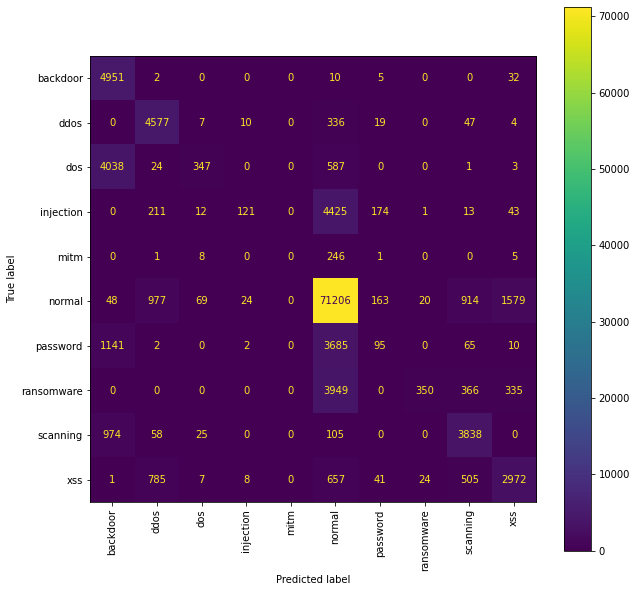

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=3000)
logistic_regression_model.fit(scaled_X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(scaled_X_val)
print(evaluate_model(y_val, logistic_regression_y_pred))
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

### KNN Algorithm

{'accuracy_score': 0.9763146250683232, 'precision_score': 0.9139897610275718, 'recall_score': 0.9233031724137932, 'f1_score': 0.9181335854627442}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.97      0.97      0.97      5000
           2       0.98      0.98      0.98      5000
           3       0.97      0.96      0.97      5000
           4       0.59      0.56      0.57       261
           5       1.00      0.99      0.99     75000
           6       0.86      0.99      0.92      5000
           7       0.86      0.90      0.88      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.91      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.91      0.92      0.92    115261
weighted avg       0.98      0.98      0.98    115261



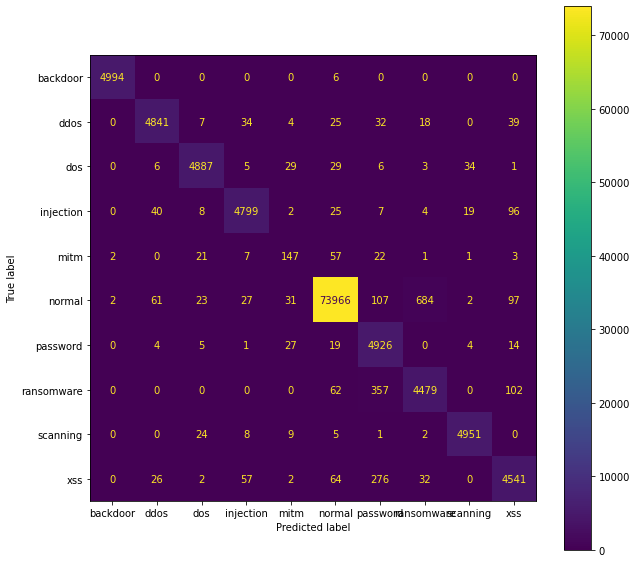

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_val)

print(evaluate_model(y_val, knn_y_pred))
plot_confusion_matrix(y_val, knn_y_pred, label)
print(classification_report(y_val, knn_y_pred))

### Support Vector Machine

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))
plot_confusion_matrix(y_val, y_pred_svm, label)

### Decision Tree Classifier

{'accuracy_score': 0.9805745221714196, 'precision_score': 0.9292675324839212, 'recall_score': 0.9319894406130269, 'f1_score': 0.930457464873143}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.97      0.96      0.97      5000
           2       0.99      0.98      0.98      5000
           3       0.97      0.96      0.97      5000
           4       0.62      0.62      0.62       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.92      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.93      0.93      0.93    115261
weighted avg       0.98      0.98      0.98    115261



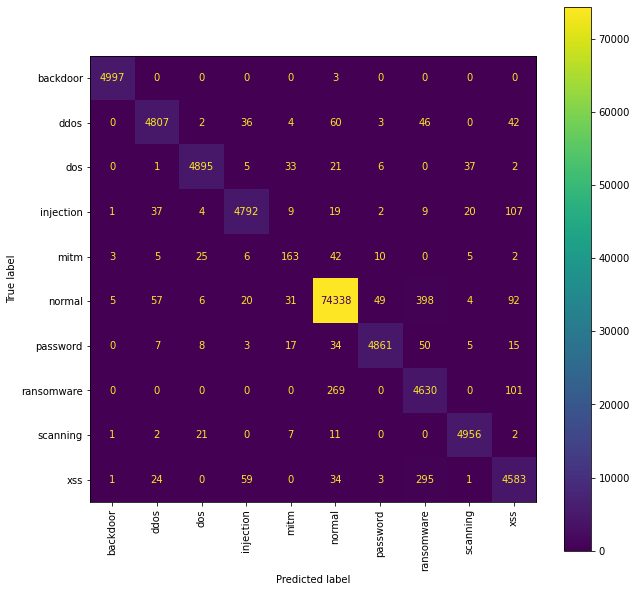

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                             min_samples_split=40,
                                             random_state=0)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(scaled_X_val)

print(evaluate_model(y_val, decision_tree_y_pred))
print(classification_report(y_val, decision_tree_y_pred))
plot_confusion_matrix(y_val, decision_tree_y_pred, label)

### Random Forest Classifier

{'accuracy_score': 0.982118843320811, 'precision_score': 0.9423070453315662, 'recall_score': 0.943321318007663, 'f1_score': 0.9426273967382505}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.98      0.96      0.97      5000
           2       0.99      0.98      0.99      5000
           3       0.98      0.96      0.97      5000
           4       0.72      0.72      0.72       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.93      0.93      5000

    accuracy                           0.98    115261
   macro avg       0.94      0.94      0.94    115261
weighted avg       0.98      0.98      0.98    115261



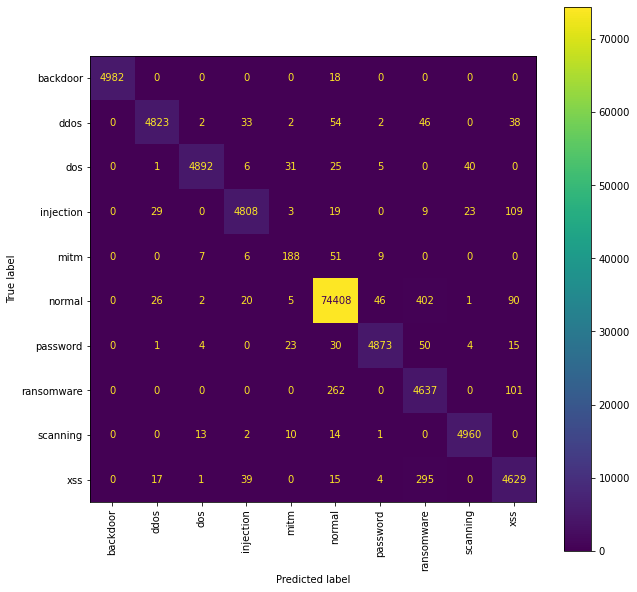

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,
                                             criterion="entropy",
                                             min_samples_split=30,
                                             random_state=0)
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(scaled_X_val)

print(evaluate_model(y_val, random_forest_y_pred))
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

### Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.06437563442968566, 'precision_score': 0.24908204132329556, 'recall_score': 0.14147627586206896, 'f1_score': 0.05163697553970753}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.67      0.00      0.01      5000
           2       0.02      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.26      0.03      0.06       261
           5       0.96      0.01      0.01     75000
           6       0.16      0.30      0.21      5000
           7       0.05      1.00      0.10      5000
           8       0.00      0.00      0.00      5000
           9       0.38      0.07      0.12      5000

    accuracy                           0.06    115261
   macro avg       0.25      0.14      0.05    115261
weighted avg       0.68      0.06      0.03    115261



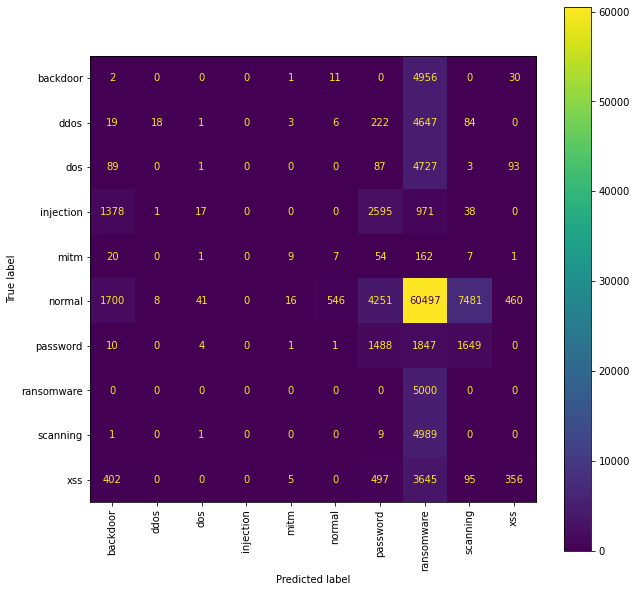

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(scaled_X_train, y_train)
y_pred_nb = naive_bayes_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))
plot_confusion_matrix(y_val, y_pred_nb, label)

### XGBOOST

{'accuracy_score': 0.9735296414225106, 'precision_score': 0.9174756459621378, 'recall_score': 0.9135283218390804, 'f1_score': 0.9149217531709837}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.98      0.93      0.96      5000
           2       0.99      0.97      0.98      5000
           3       0.96      0.93      0.95      5000
           4       0.58      0.54      0.56       261
           5       0.99      0.99      0.99     75000
           6       0.98      0.97      0.98      5000
           7       0.81      0.92      0.86      5000
           8       0.98      0.99      0.98      5000
           9       0.90      0.90      0.90      5000

    accuracy                           0.97    115261
   macro avg       0.92      0.91      0.91    115261
weighted avg       0.97      0.97      0.97    115261



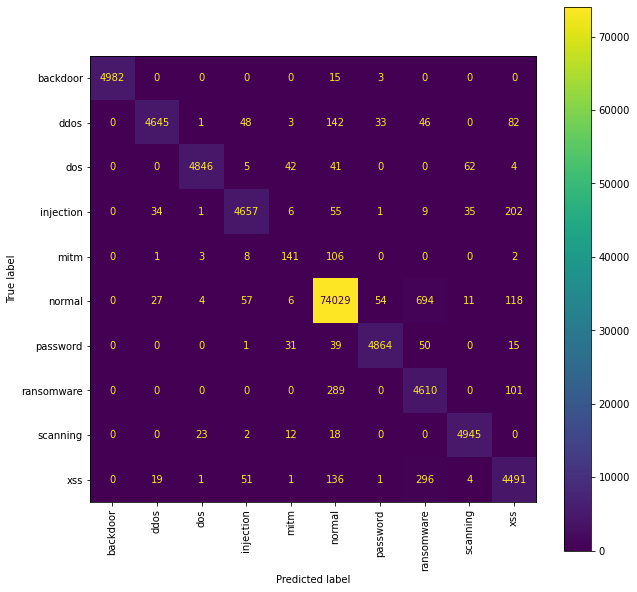

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(scaled_X_train, y_train)
y_pred_xgb = xgboost_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
plot_confusion_matrix(y_val, y_pred_xgb, label)

### Artificial Neural Network

In [23]:
from tensorflow.keras.utils import to_categorical

encoded_y_train = to_categorical(y_train)
encoded_y_val = to_categorical(y_val)
encoded_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
import tensorflow as tf
print(tf.__version__)

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=9, activation='softmax')) # Corrected units to 9

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = ann_model.fit(scaled_X_train, encoded_y_train, validation_split=0.25, batch_size=32, epochs=100)

2.19.0
Epoch 1/100
5642/5642 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6985 - loss: 0.8309 - precision_1: 0.7750 - recall_1: 0.5846 - val_accuracy: 0.8372 - val_loss: 0.5031 - val_precision_1: 0.8439 - val_recall_1: 0.8279
Epoch 2/100
5642/5642 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8489 - loss: 0.4775 - precision_1: 0.8553 - recall_1: 0.8275 - val_accuracy: 0.8662 - val_loss: 0.4363 - val_precision_1: 0.8680 - val_recall_1: 0.8476
Epoch 3/100
5642/5642 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8675 - loss: 0.4376 - precision_1: 0.8719 - recall_1: 0.8454 - val_accuracy: 0.8733 - val_loss: 0.4100 - val_precision_1: 0.8766 - val_recall_1: 0.8528
Epoch 4/100
5642/5642 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8733 - loss: 0.4378 - precision_1: 0.8806 - recall_1: 0.8527 - val_accuracy: 0.8759 - val_loss: 0.3935 - val_precision_1: 0.8876 - val_recall_1: 0.8515
Epoch 5/100
5642/5642 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8779 - loss: 0.3903 - precision_1: 

In [29]:
ann_model_InSDN = ann_model
ann_model_InSDN.summary()
ann_y_pred = ann_model_InSDN.predict(scaled_X_val)
ann_y_pred = (ann_y_pred > 0.5)
ann_y_pred

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 413 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 828 (3.24 KB)

3224/3224 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [30]:

# Check the validation accuracy
_, accuracy, precision, recall = ann_model_InSDN.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

3224/3224 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9367 - loss: 0.2026 - precision_1: 0.9449 - recall_1: 0.9296
Accuracy: 93.76


Text(0.5, 0, 'epoch')

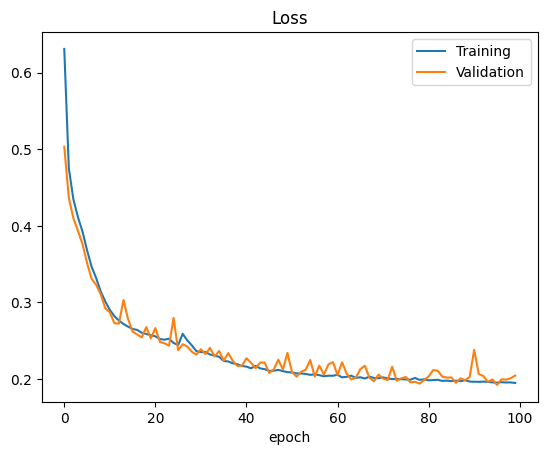

In [31]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

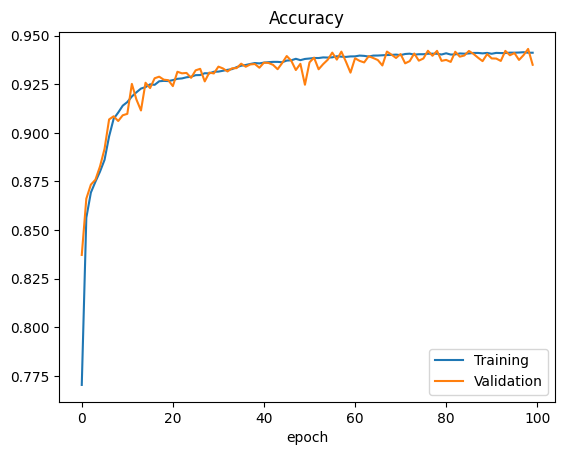

In [32]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

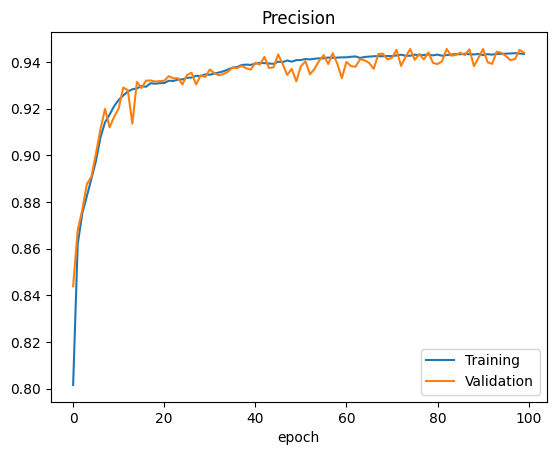

In [33]:
# Plot graph between training and validation precision
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.legend(['Training', 'Validation'])
plt.title('Precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

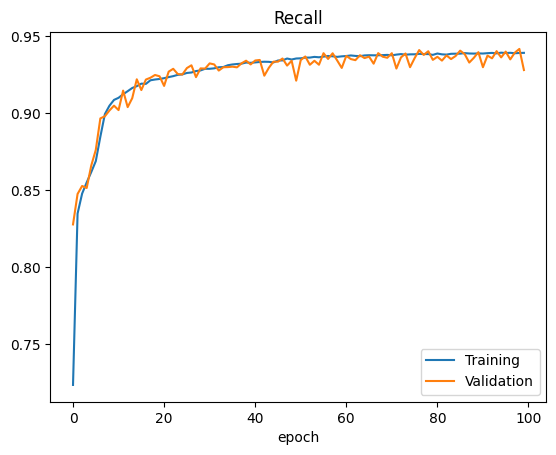

In [35]:
# Plot graph between training and validation recall
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.legend(['Training', 'Validation'])
plt.title('Recall')
plt.xlabel('epoch')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

{'accuracy_score': 0.9308015159886398, 'precision_score': 0.5366051142297765, 'recall_score': 0.5525428281490244, 'f1_score': 0.5360199866427615}
              precision    recall  f1-score   support

           0       0.07      0.29      0.11       421
           1       0.00      0.00      0.00        49
           2       0.89      0.99      0.94     22059
           3       0.99      0.97      0.98     14524
           4       0.98      0.89      0.93     16085
           5       0.95      0.92      0.94     20527
           6       0.95      0.91      0.93     29439
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        58

    accuracy                           0.93    103167
   macro avg       0.54      0.55      0.54    103167
weighted avg       0.94      0.93      0.94    103167



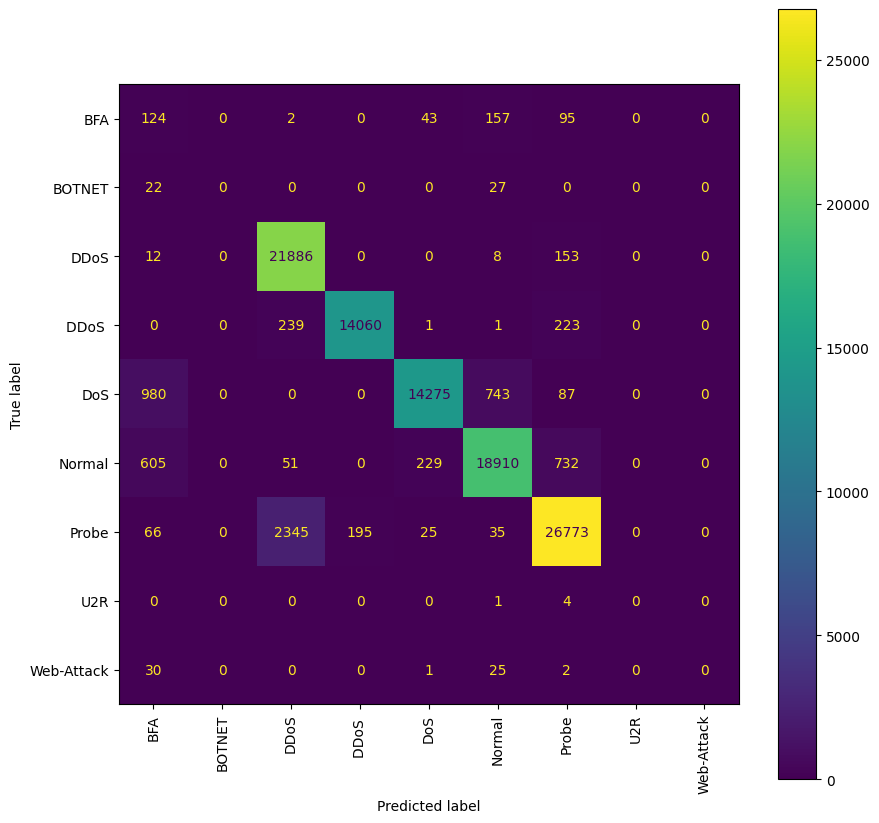

In [38]:
print(evaluate_model(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1), label)

In [39]:
import tensorflow as tf

ann_model_InSDN.save('my_model.keras')

## Hybrid Model

{'accuracy_score': 0.9817371010142198, 'precision_score': 0.9410593810316132, 'recall_score': 0.9432982681992337, 'f1_score': 0.941971513267484}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.99      0.96      0.98      5000
           2       1.00      0.98      0.99      5000
           3       0.97      0.96      0.96      5000
           4       0.71      0.73      0.72       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.92      0.93      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.94      0.94      0.94    115261
weighted avg       0.98      0.98      0.98    115261



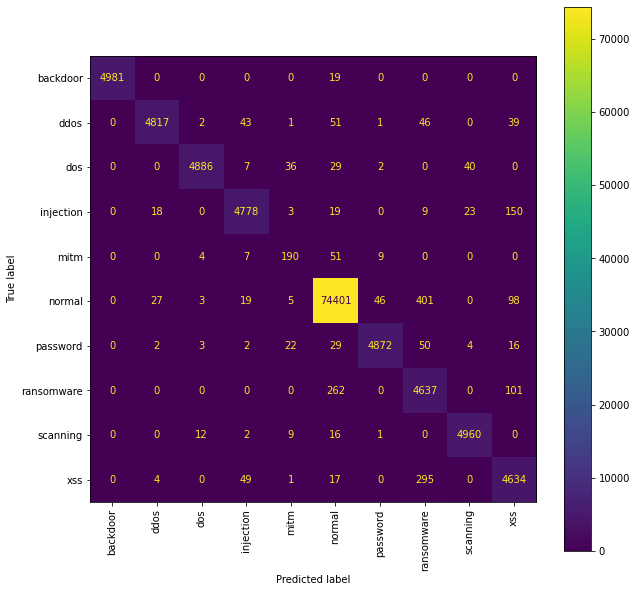

In [ ]:
# Defining Hybrid Ensemble Learning Model

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

estimators = []

#Defining Decision Tree Classifiers
model1 = DecisionTreeClassifier(criterion='gini',
                                min_samples_split=55,
                               random_state=0)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(criterion='entropy',
                                min_samples_split=50,
                                random_state=0)
estimators.append(('cart3', model2))


#Defining K-NN classifiers
model3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
estimators.append(('knn1', model3))

model4 = XGBClassifier()
estimators.append(('xgboost', model4))

model5 = RandomForestClassifier(n_estimators=100,
                                criterion="entropy",
                                min_samples_split=40,
                                random_state=0)
estimators.append(('rf1', model5))

model6 = RandomForestClassifier(n_estimators=200,
                                criterion="entropy",
                                min_samples_split=35,
                                random_state=0)
estimators.append(('rf2', model6))

# Defining the ensemble model
ensemble = VotingClassifier(estimators,
                            voting='hard',
                            weights=[1, 1, 1, 1, 1.1, 1.1])

ensemble.fit(scaled_X_train, y_train)
y_pred_hybrid = ensemble.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_hybrid))
print(classification_report(y_val, y_pred_hybrid))
plot_confusion_matrix(y_val, y_pred_hybrid, label)

# Visualize the Results

In [ ]:
# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_score_tf = [0.767450, 0.976315, 0.64376, 0.980575, 0.982119, 0.973530, 0.795343, 0.981737]
precision_score_tf = [0.57739, 0.91399, 0.24908, 0.92927, 0.94231, 0.91748, 0.595091, 0.94106]
recall_score_tf = [0.43996, 0.92330, 0.14148, 0.93199, 0.94332, 0.91353, 0.56224, 0.94330]
f1_score_tf = [0.39360, 0.91813, 0.05164, 0.93046, 0.94263, 0.91492, 0.524571, 0.94197]

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree",
          "Random Forest", "XGBoost", "ANN", "Hybrid Model"]

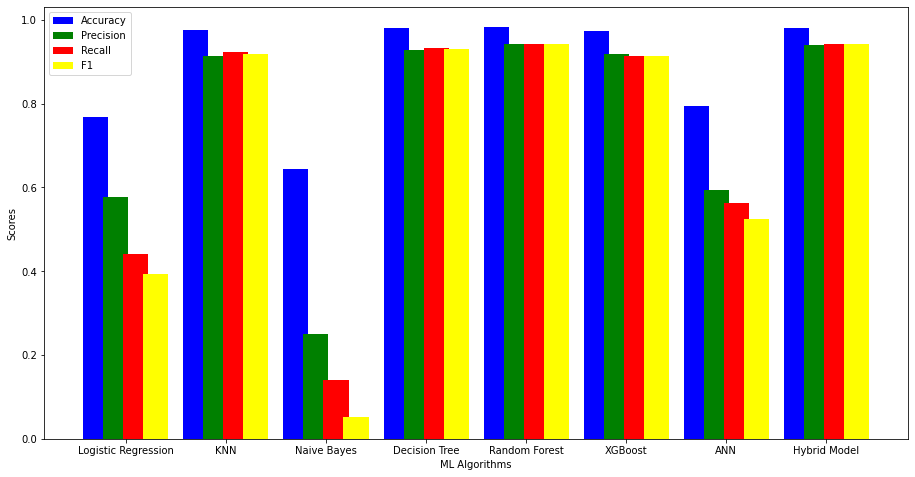

In [ ]:
X = np.arange(8)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, accuracy_score_tf, color = 'b', width = 0.25)
ax.bar(X + 0.20, precision_score_tf, color = 'g', width = 0.25)
ax.bar(X + 0.40, recall_score_tf, color = 'r', width = 0.25)
ax.bar(X + 0.60, f1_score_tf, color = 'yellow', width = 0.25)
plt.xticks(X+0.30, models)
plt.xlabel("ML Algorithms")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall", "F1"])

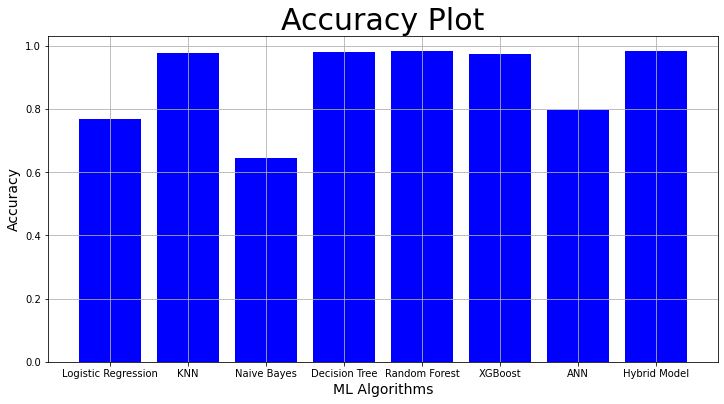

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12,6))
colour = ['green', 'blue', 'orange', 'violet', 'brown', 'red', 'magenta', 'yellow']

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree",
          "Random Forest", "XGBoost", "ANN", "Hybrid Model"]
ax = plt.gca()

plt.bar(models, accuracy_score_tf, color='b')
plt.title('Accuracy Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

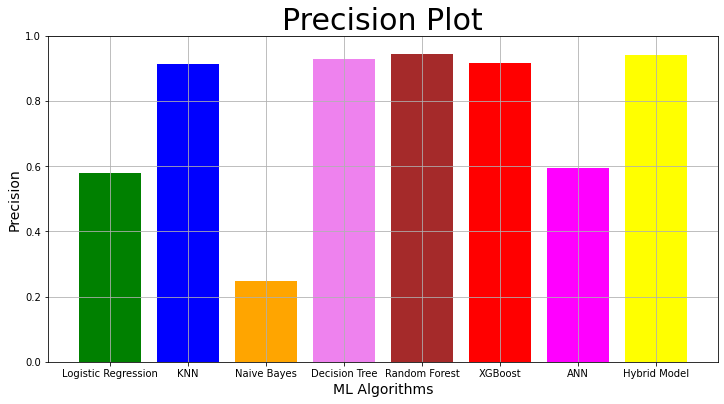

In [ ]:
# Precision Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, precision_score_tf, color=colour)
plt.title('Precision Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

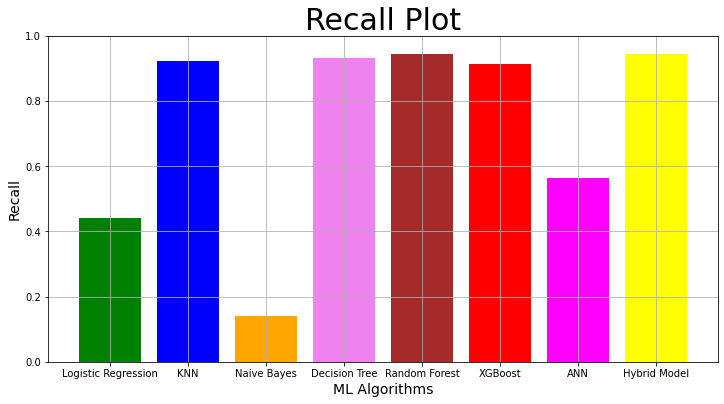

In [ ]:
# Recall Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, recall_score_tf, color=colour)
plt.title('Recall Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.grid(True)
plt.show()

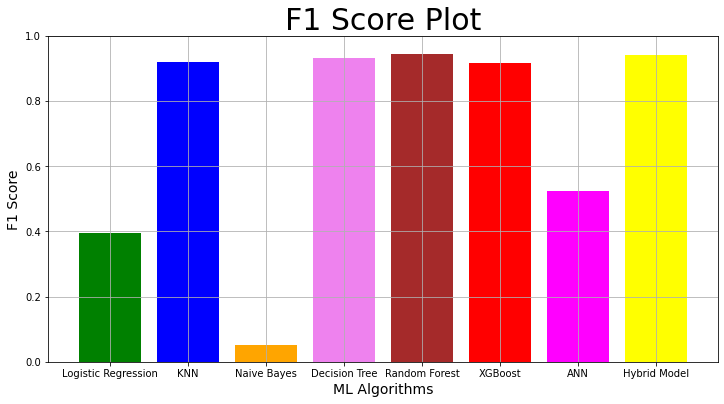

In [ ]:
# F1-Score Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, f1_score_tf, color=colour)
plt.title('F1 Score Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()